https://carpentries-incubator.github.io/machine-learning-novice-sklearn/07-neural-networks/index.html

In [ ]:
import numpy as np
def perceptron(inputs, weights, threshold):

    assert len(inputs) == len(weights)

    # multiply the inputs and weights
    values = np.multiply(inputs,weights)

    # sum the results
    total = sum(values)

    # decide if we should activate the perceptron
    if total < threshold:
        return 0
    else:
        return 1

#O

In [ ]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 0.5))

[0.0, 0.0] 0
[1.0, 0.0] 1
[0.0, 1.0] 1
[1.0, 1.0] 1


#Y

In [ ]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 1.0))

[0.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 0
[1.0, 1.0] 1


#No

In [ ]:
inputs = [[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [-1.0,1.0], 1.0))

[0.0, 1.0] 1
[1.0, 1.0] 0


#MNIST  Sickit-Learn

In [ ]:
import sklearn.datasets as skl_data
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)
data = data / 255.0

In [ ]:
import sklearn.neural_network as skl_nn
mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1)

In [ ]:
data.shape

(70000, 784)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `data` is your feature matrix and `labels` is your target vector
X_train, X_test, y_train, y_test = train_test_split(
    data.values,        # Features
    labels.values,      # Labels
    test_size=0.1,      # Reserve 10% of data for testing
    random_state=42     # For reproducibility
)
X_train.shape

(63000, 784)

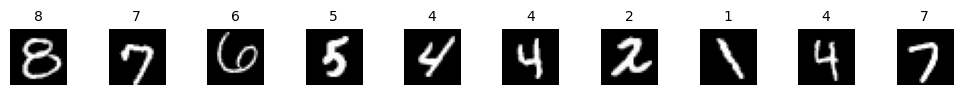

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    img = X_train[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]), fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.99424038
Iteration 2, loss = 0.76097251
Iteration 3, loss = 0.55761596
Iteration 4, loss = 0.44476861
Iteration 5, loss = 0.37475793
Iteration 6, loss = 0.32743119
Iteration 7, loss = 0.29169163
Iteration 8, loss = 0.26256325
Iteration 9, loss = 0.24252724
Iteration 10, loss = 0.22140759
Iteration 11, loss = 0.21162477
Iteration 12, loss = 0.19685763
Iteration 13, loss = 0.19203526
Iteration 14, loss = 0.18080576
Iteration 15, loss = 0.16554105
Iteration 16, loss = 0.16565783
Iteration 17, loss = 0.16133616
Iteration 18, loss = 0.14818701
Iteration 19, loss = 0.14493326
Iteration 20, loss = 0.14454850
Iteration 21, loss = 0.13413189
Iteration 22, loss = 0.13155216
Iteration 23, loss = 0.12603716
Iteration 24, loss = 0.12373214
Iteration 25, loss = 0.12467958
Iteration 26, loss = 0.11990942
Iteration 27, loss = 0.11377873
Iteration 28, loss = 0.11008903
Iteration 29, loss = 0.11132785
Iteration 30, loss = 0.10789443
Iteration 31, loss = 0.10282183
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1, verbose=1)

In [ ]:
print("Training set score", mlp.score(X_train, y_train))
print("Testing set score", mlp.score(X_test, y_test))

Training set score 0.9788888888888889
Testing set score 0.9512857142857143


In [ ]:
test_digit = X_test[0].reshape(1,784) # current shape is (784,)
test_digit_prediction = mlp.predict(test_digit)[0]
print("Predicted value",test_digit_prediction)
print("Actual value",y_test[0])

Predicted value 8
Actual value 8


In [ ]:
import matplotlib.pyplot as plt
import sklearn.datasets as skl_data
import sklearn.neural_network as skl_nn
import sklearn.model_selection as skl_msel

data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)
data = data / 255.0

mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1)

kfold = skl_msel.KFold(4)

for (train, test) in kfold.split(data):
    data_train = data.iloc[train]
    labels_train = labels.iloc[train]

    data_test = data.iloc[test]
    labels_test = labels.iloc[test]
    mlp.fit(data_train,labels_train)
    print("Training set score", mlp.score(data_train, labels_train))
    print("Testing set score", mlp.score(data_test, labels_test))
mlp.fit(data,labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score 0.9995238095238095
Testing set score 0.9681142857142857


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score 0.999447619047619
Testing set score 0.9690285714285715


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score 0.9996
Testing set score 0.9677714285714286


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score 0.9996761904761905
Testing set score 0.9719428571428571


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1)

In [ ]:
!wget https://zenodo.org/records/10845026/files/Galaxy10_DECals.h5

--2025-06-22 01:20:34--  https://zenodo.org/records/10845026/files/Galaxy10_DECals.h5
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2735267419 (2.5G) [application/octet-stream]
Saving to: ‘Galaxy10_DECals.h5’

Galaxy10_DECals.h5  100%[===================>]   2.55G  20.5MB/s    in 2m 3s   

2025-06-22 01:22:38 (21.2 MB/s) - ‘Galaxy10_DECals.h5’ saved [2735267419/2735267419]



# Dataset Galaxy10 DECaLS

El **Galaxy10 DECaLS** es un conjunto de datos que contiene **17.736 imágenes de galaxias en color de 256x256 píxeles** (bandas g, r y z), clasificadas en **10 categorías** diferentes.

El archivo `Galaxy10_DECaLS.h5` contiene las siguientes columnas:

- `images`: imágenes de galaxias con forma `(17736, 256, 256, 3)`
- `ans`: etiqueta de clase (de 0 a 9)
- `ra`: ascensión recta
- `dec`: declinación
- `redshift`: corrimiento al rojo
- `pxscale`: escala en arcosegundos por píxel

---

## Origen de los datos

Las imágenes de Galaxy10 DECaLS provienen de los **DESI Legacy Imaging Surveys**, que incluyen:

- **BASS** (Beijing-Arizona Sky Survey)  
- **DECaLS** (DECam Legacy Survey)  
- **MzLS** (Mayall z-band Legacy Survey)

Las etiquetas de clasificación fueron generadas por el proyecto **Galaxy Zoo**, una colaboración de ciencia ciudadana.

---

## Clases del Dataset Galaxy10 (17.736 imágenes)

* Clase 0 (1081 imágenes): Galaxias perturbadas
* Clase 1 (1853 imágenes): Galaxias en proceso de fusión
* Clase 2 (2645 imágenes): Galaxias suaves redondas
* Clase 3 (2027 imágenes): Galaxias suaves entre redondas y alargadas
* Clase 4 ( 334 imágenes): Galaxias suaves en forma de cigarro
* Clase 5 (2043 imágenes): Galaxias espirales con barra
* Clase 6 (1829 imágenes): Galaxias espirales cerradas sin barra
* Clase 7 (2628 imágenes): Galaxias espirales abiertas sin barra
* Clase 8 (1423 imágenes): Galaxias de perfil sin bulbo
* Clase 9 (1873 imágenes): Galaxias de perfil con bulbo





En el vasto escenario del universo observable, las galaxias constituyen los sistemas más grandes y complejos organizados gravitacionalmente. Desde hace más de un siglo, los astrónomos han clasificado las galaxias de acuerdo con su morfología, con el fin de comprender no solo sus propiedades estructurales, sino también los procesos físicos que subyacen en su formación y evolución. El conjunto de datos Galaxy10 DECaLS ofrece una valiosa colección de imágenes de galaxias divididas en diez clases morfológicas, cada una representando diferentes etapas y características del desarrollo galáctico.

La Clase 0 corresponde a las galaxias perturbadas, estructuras cuyas formas han sido alteradas por interacciones gravitacionales con otras galaxias. Estas perturbaciones suelen ser el resultado de encuentros cercanos o colisiones pasadas, que generan efectos de marea y deformaciones asimétricas en el disco galáctico. En términos dinámicos, estas galaxias se encuentran lejos del equilibrio virial, y exhiben una morfología caótica que indica una historia reciente de interacción.

La Clase 1 agrupa a las galaxias en proceso de fusión. Se trata de sistemas binarios o múltiples que están siendo atraídos mutuamente por su gravedad y cuyas estructuras están comenzando a entrelazarse. La dinámica de estas fusiones tiene profundas implicaciones en la evolución galáctica, ya que puede desencadenar brotes de formación estelar, alimentar núcleos galácticos activos e incluso llevar a la formación de galaxias elípticas si el proceso culmina en una coalescencia completa.

Las Clases 2 a 4 describen galaxias de aspecto suave, es decir, aquellas que no presentan brazos espirales ni detalles internos marcados. La Clase 2 incluye galaxias suaves redondas, con una apariencia casi esférica o ligeramente elíptica. Estas son típicamente galaxias elípticas, donde la dinámica está dominada por órbitas aleatorias en lugar de rotación organizada. La Clase 3 representa galaxias suaves entre redondas y alargadas, estructuras lenticulares o elípticas elongadas que sugieren una cierta anisotropía en la distribución de velocidades estelares. En la Clase 4 se encuentran las galaxias suaves en forma de cigarro, cuyo perfil alargado y ausencia de detalles indica que podrían ser discos vistos de canto o elípticas muy achatadas.

Las Clases 5 a 7 están dedicadas a las galaxias espirales, que representan un equilibrio entre la rotación ordenada del disco y la presencia de estructuras internas complejas. En la Clase 5, observamos galaxias espirales con barra, caracterizadas por una estructura lineal brillante que cruza el núcleo y desde donde emergen los brazos espirales. Estas barras se asocian con la redistribución del momento angular y el transporte de gas hacia el centro galáctico, lo cual puede influir en la actividad del agujero negro central. La Clase 6 reúne galaxias espirales cerradas sin barra, cuyos brazos están fuertemente enrollados alrededor del bulbo, dando lugar a una apariencia más compacta y simétrica. Por otro lado, en la Clase 7, se incluyen las galaxias espirales abiertas sin barra, que muestran brazos extendidos y menos enrollados, evidenciando una evolución diferente o un grado menor de concentración central.

Finalmente, las Clases 8 y 9 se enfocan en la geometría aparente de las galaxias vistas de perfil. La Clase 8 contiene galaxias de perfil sin bulbo, donde el disco es visible de canto pero no se distingue una concentración central prominente. Este tipo morfológico puede indicar una baja densidad estelar en el centro o una etapa temprana en la formación del bulbo. En contraste, la Clase 9 abarca galaxias de perfil con bulbo, cuya estructura revela claramente una región central brillante —el bulbo galáctico— superpuesto al disco delgado. Este rasgo es importante porque el bulbo alberga típicamente poblaciones estelares viejas y puede contener un agujero negro supermasivo, siendo un componente clave en los modelos de formación jerárquica de galaxias.

Este sistema de clasificación no solo permite caracterizar morfológicamente las galaxias, sino que constituye una herramienta fundamental para los estudios de evolución cósmica, dinámica galáctica y formación estelar. Desde la perspectiva de la física, cada clase representa una manifestación observable de procesos internos complejos: interacciones gravitacionales, conservación del momento angular, hidrodinámica del gas interestelar, colapsos gravitacionales, retroalimentación estelar y nuclear, entre muchos otros. Así, el estudio de estas imágenes nos ofrece una ventana directa al pasado del universo, revelando las fuerzas que han esculpido su estructura a lo largo de miles de millones de años.

Shape de las imágenes: (17736, 256, 256, 3)
Shape de las etiquetas: (17736,)


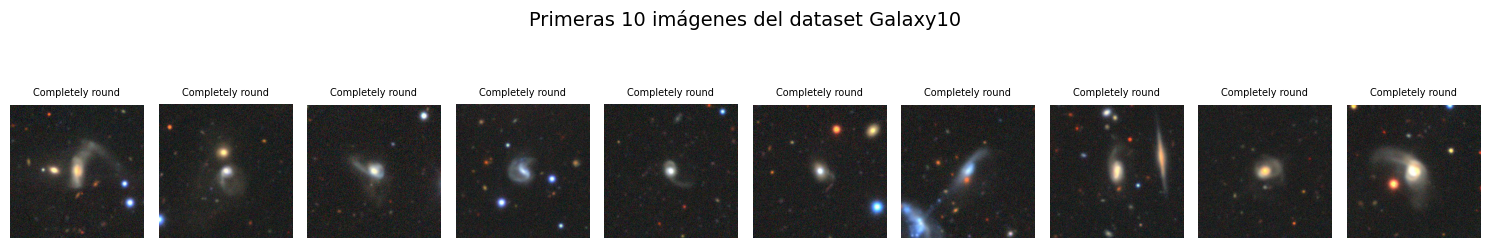

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#1. Cargar datos desde Galaxy10.h5
with h5py.File('Galaxy10_DECals.h5', 'r') as f:
    images = np.array(f['images'])     # shape: (N, 69, 69, 3)
    labels = np.array(f['ans'])        # shape: (N,)

print("Shape de las imágenes:", images.shape)
print("Shape de las etiquetas:", labels.shape)

#2. Visualización inicial de 10 imágenes
class_names = ["Completely round", "In-between round", "Cigar-shaped",
    "Edge-on no bulge", "Edge-on bulge", "Spiral barred",
    "Spiral unbarred", "Spiral edge-on", "Merging", "Irregular"]

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]], fontsize=7)
    plt.axis('off')
plt.suptitle("Primeras 10 imágenes del dataset Galaxy10", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Preprocesamiento
X = images.reshape(images.shape[0], -1)  # Aplanar imágenes
y = labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 4. División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento con RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Evaluación del modelo
y_pred = clf.predict(X_test)
print("Accuracy en test:", clf.score(X_test, y_test))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# 7. Visualizar algunas predicciones
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    original_img = X_test[idx].reshape(69, 69, 3)
    axs[i].imshow(original_img)
    axs[i].set_title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_test[idx]]}", fontsize=9)
    axs[i].axis('off')
plt.tight_layout()
plt.show()